In [1]:
%load_ext autoreload
%autoreload 2

import tqdm
import _set_path
from pbpi.algo_core.training import evaluations_per_config

In [2]:
ALGO_TYPE = {'original': {'name': 'original', 'exploration': False}
            ,'modified': {'name': 'modified', 'exploration': True} }

In [4]:
############################################
################## INPUTS ##################

# Configs to test
N_STATES = 50

configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [3]
          , 'Roll-outs': [20]
          , 'Significance' : [0.1]
          #, 'init_state_path': './manual_init_state_input/uniformly_sampled_states.csv'
          }

algorithm = ALGO_TYPE['modified']

############################################
############################################

# Algorithm configs
ALGO_NAME = algorithm['name']
EXPLORE_LOGIC = algorithm['exploration']

Evaluations:   0%|          | 0/1 [31:36<?, ?it/s]

Runs:   0%|          | 0/5 [00:00<?, ?it/s]
Currently evaluated configs:
 Samples: 50 | Actions: 3 | Roll-outs: 20 | Significance: 0.1


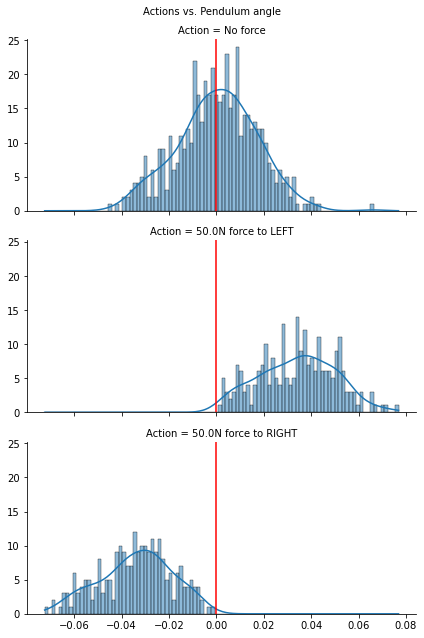


Policy Iteration: 1 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, 0.07, 0])


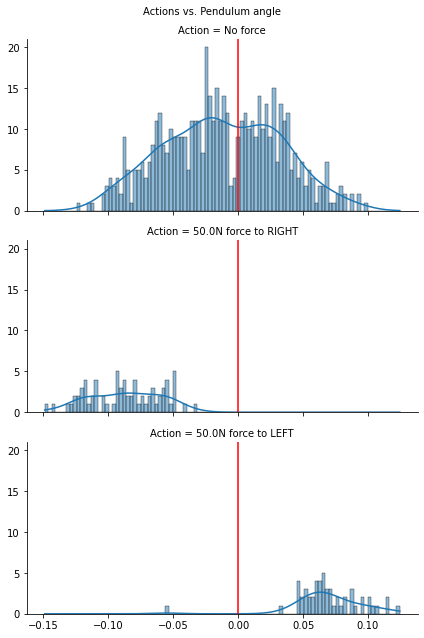


Policy Iteration: 2 - Length of the evaluation episode: 655.0 (init. state: [0, 0, -0.06, 0])
Policy performance decreased! Run-1 terminated!


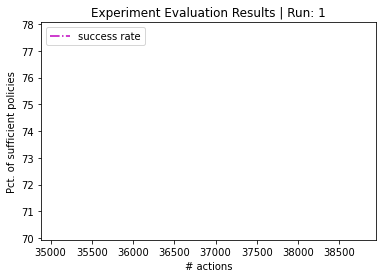


Runs:  20%|██        | 1/5 [01:57<07:48, 117.04s/it]

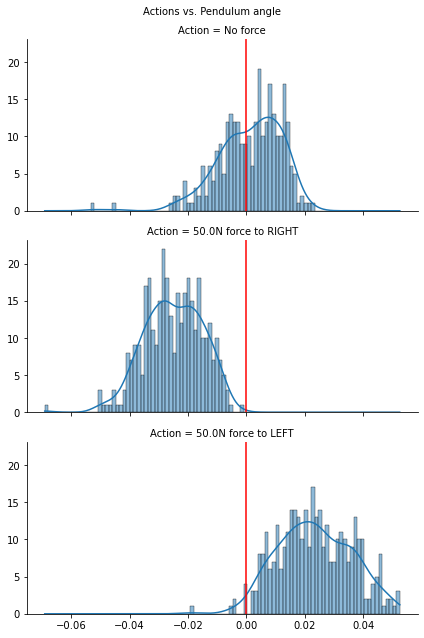


Policy Iteration: 1 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, -0.04, 0])


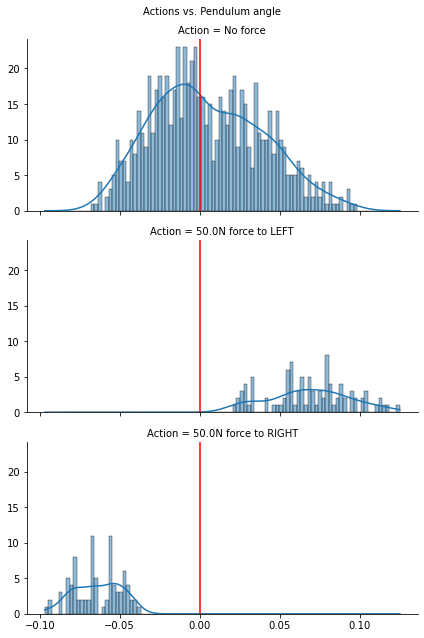


Policy Iteration: 2 - Length of the evaluation episode: 905.0 (init. state: [0, 0, 0.08, 0])


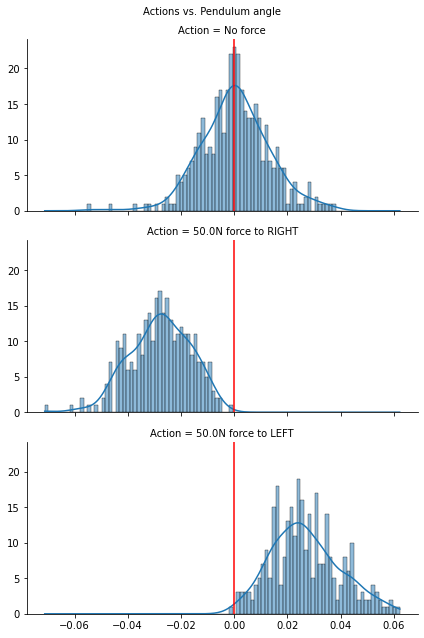


Policy Iteration: 3 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, -0.05, 0])


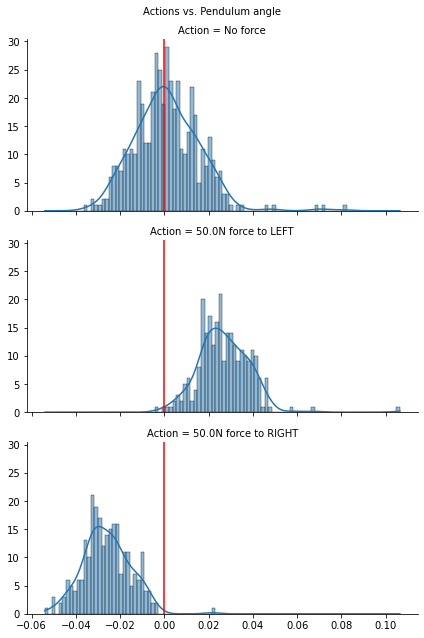


Policy Iteration: 4 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, 0.07, 0])


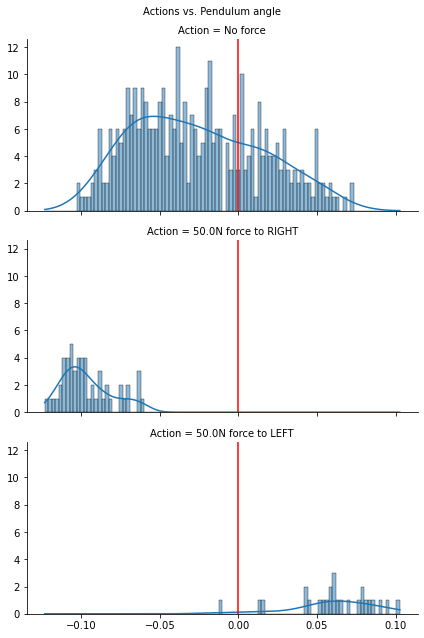


Policy Iteration: 5 - Length of the evaluation episode: 431.0 (init. state: [0, 0, -0.04, 0])
Policy performance decreased! Run-2 terminated!


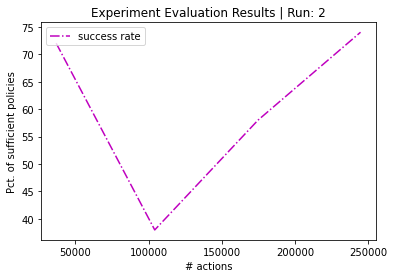


Runs:  40%|████      | 2/5 [07:40<09:15, 185.05s/it]

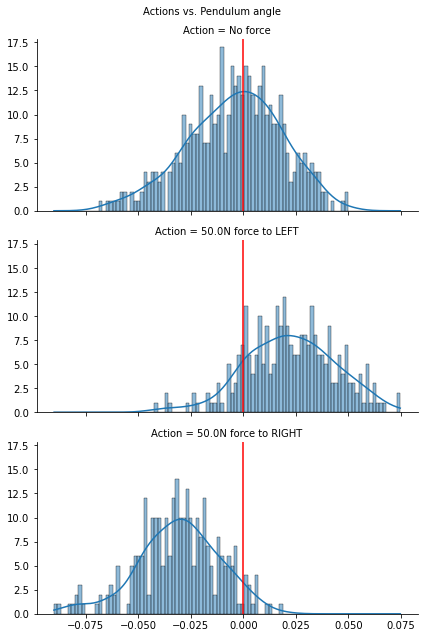


Policy Iteration: 1 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, 0.03, 0])


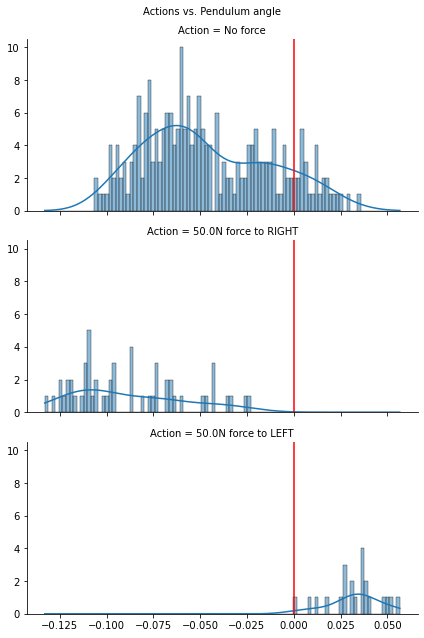


Policy Iteration: 2 - Length of the evaluation episode: 306.0 (init. state: [0, 0, -0.07, 0])
Policy performance decreased! Run-3 terminated!


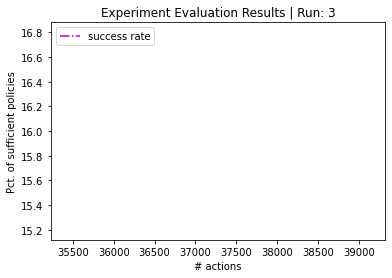


Runs:  60%|██████    | 3/5 [09:41<05:31, 165.90s/it]

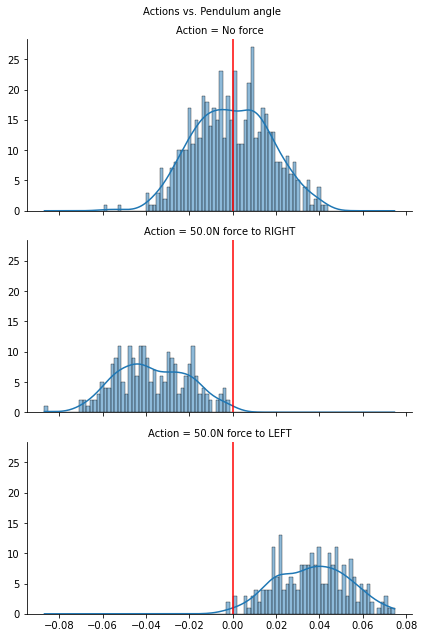


Policy Iteration: 1 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, -0.01, 0])


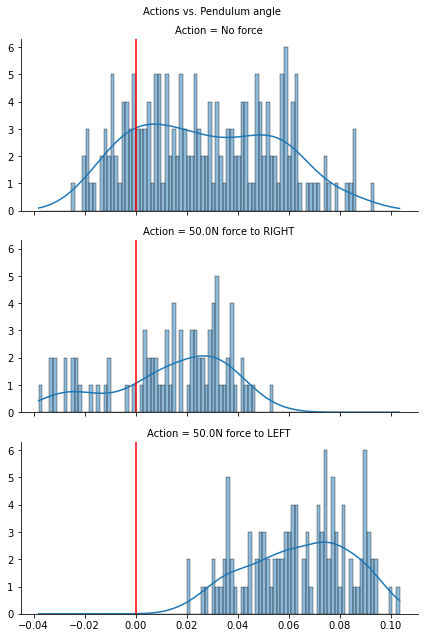


Policy Iteration: 2 - Length of the evaluation episode: 379.0 (init. state: [0, 0, -0.0, 0])
Policy performance decreased! Run-4 terminated!


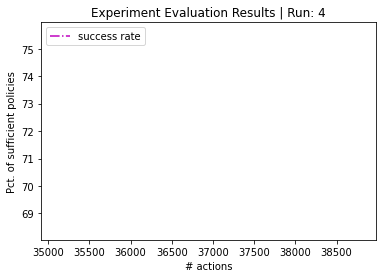


Runs:  80%|████████  | 4/5 [11:45<02:33, 153.24s/it]

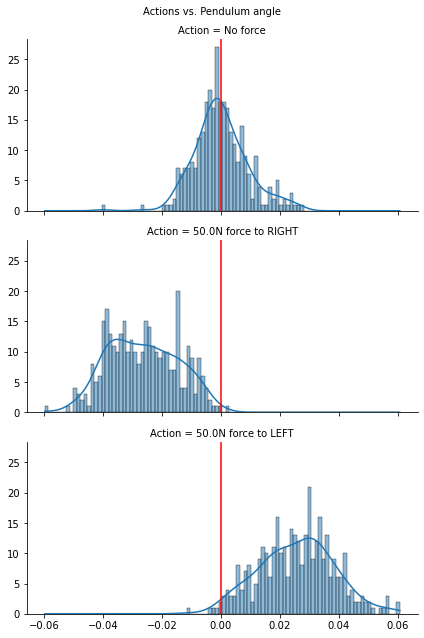


Policy Iteration: 1 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, -0.01, 0])


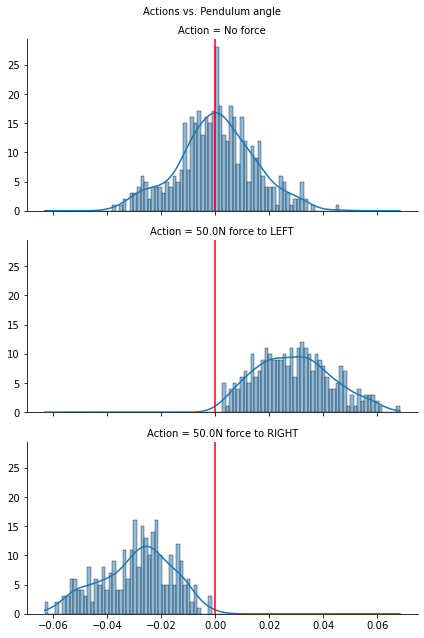


Policy Iteration: 2 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, 0.01, 0])


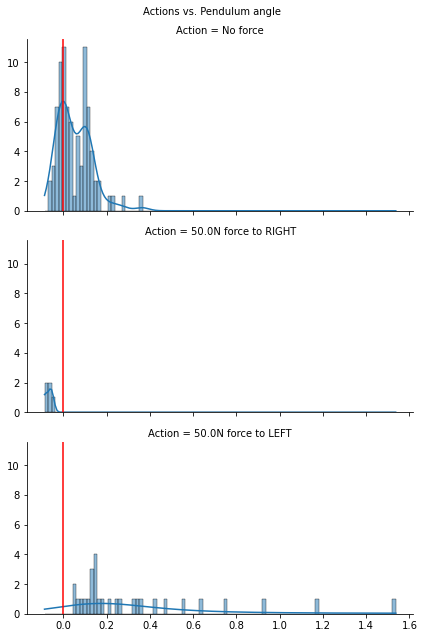


Policy Iteration: 3 - Length of the evaluation episode: 119.0 (init. state: [0, 0, -0.02, 0])
Policy performance decreased! Run-5 terminated!


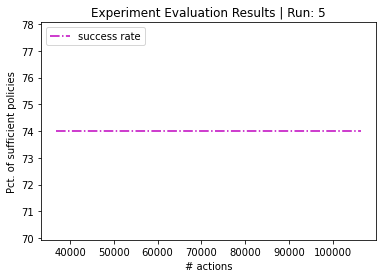


Evaluations: 100%|██████████| 1/1 [15:26<00:00, 926.53s/it]


In [318]:
# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size          = sample_size
                                                #, init_state_path       = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions      = configs['Actions'][0]
                                                , max_n_rollouts = rollout_max
                                                , sig_lvl        = sig_lvl

                                                , max_policy_iter_per_run = 5 # Maximum number of policy iterations per experiment
                                                , runs_per_config         = 5 # Number of experiments per one parameter config

                                                , eval_runs_per_state     = 1 # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = False # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = True # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = True # Show SR vs. action no. plot of exp. run
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

In [59]:
# # Save the evaluation results
# results_dfs = []
# for result in agg_results:
#     results_dfs.append(pd.DataFrame(result))

# results_df = pd.concat(results_dfs)

# results_df.to_excel(f"eval_results/{ALGO_NAME}_experiment_results_para_config_{configs['CONFIG_NO']}.xlsx", index=False)

Runs:   0%|          | 0/5 [00:00<?, ?it/s]


Currently evaluated configs:
 Samples: 50 | Actions: 5 | Roll-outs: 20 | Significance: 0.1


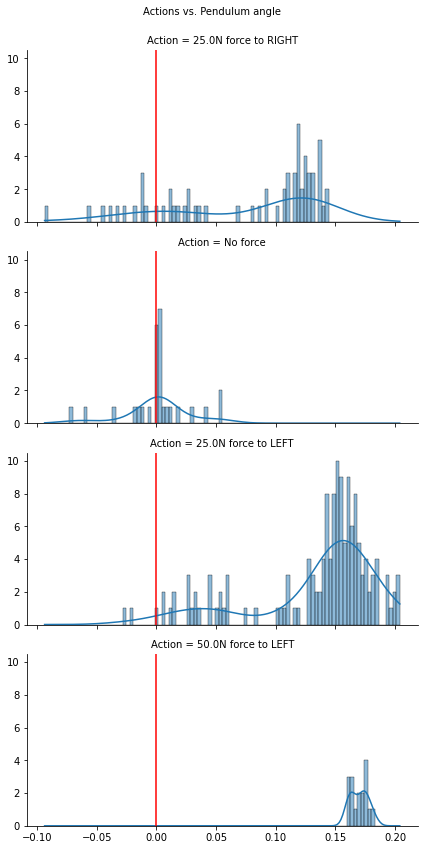


Policy Iteration: 1 - Length of the evaluation episode: 255.0 (init. state: [0, 0, -0.09, 0])


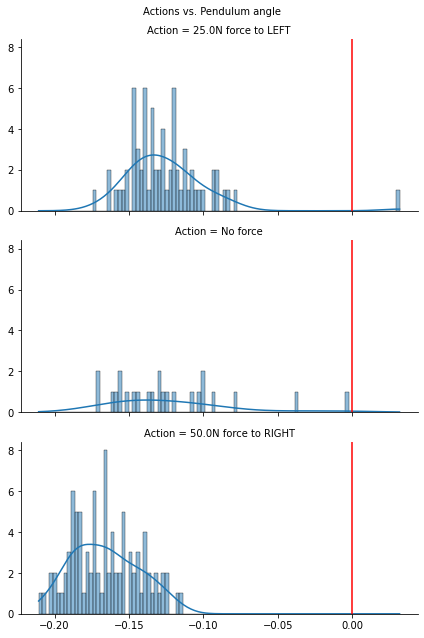


Policy Iteration: 2 - Length of the evaluation episode: 184.0 (init. state: [0, 0, 0.03, 0])


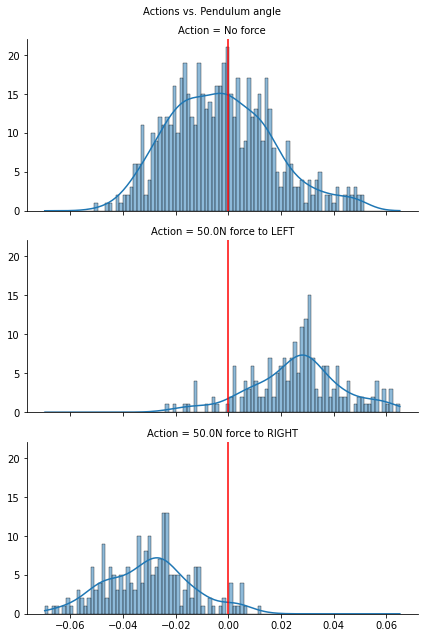


Policy Iteration: 3 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, 0.04, 0])


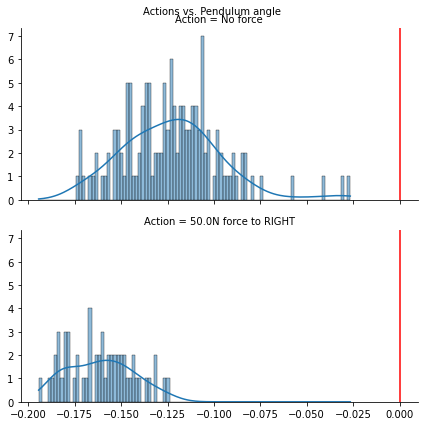


Policy Iteration: 4 - Length of the evaluation episode: 192.0 (init. state: [0, 0, -0.03, 0])
Policy performance decreased! Run-1 terminated!


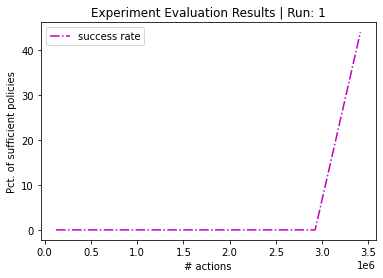


Runs:  20%|██        | 1/5 [31:13<2:04:53, 1873.35s/it]

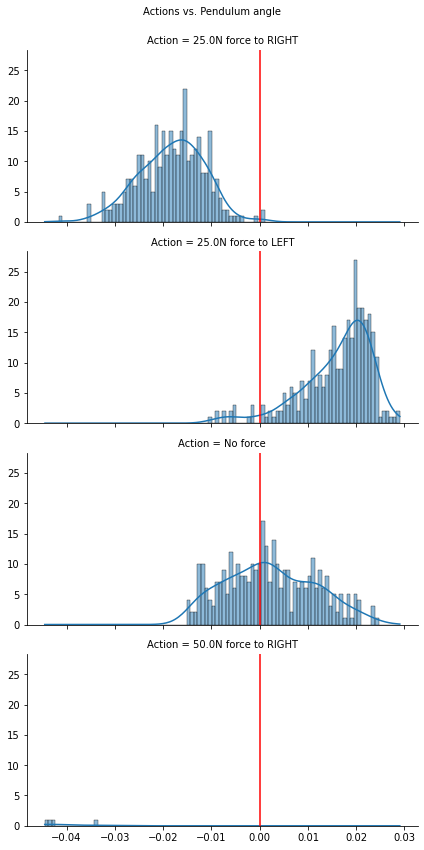


Policy Iteration: 1 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, -0.04, 0])


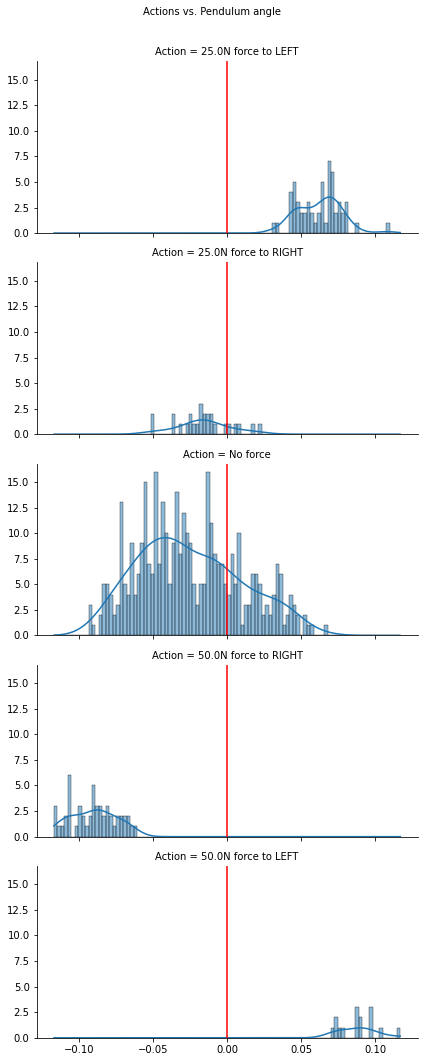


Policy Iteration: 2 - Length of the evaluation episode: 529.0 (init. state: [0, 0, 0.07, 0])
Policy performance decreased! Run-2 terminated!


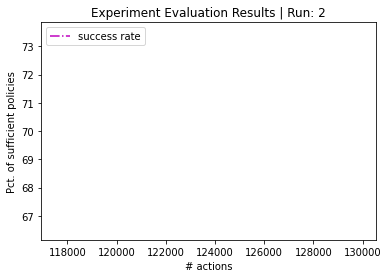


Runs:  40%|████      | 2/5 [1:00:49<1:32:13, 1844.34s/it]

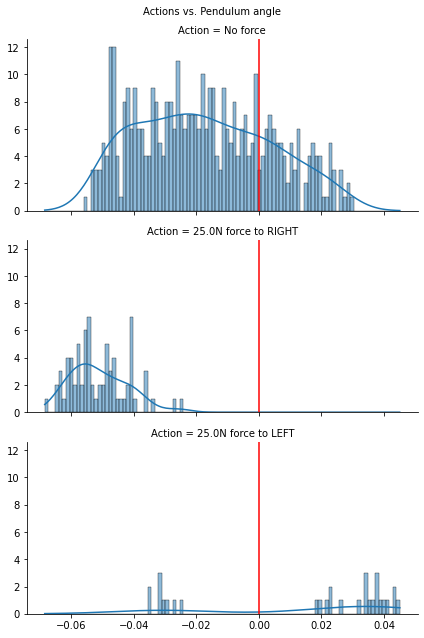


Policy Iteration: 1 - Length of the evaluation episode: 501.0 (init. state: [0, 0, -0.03, 0])


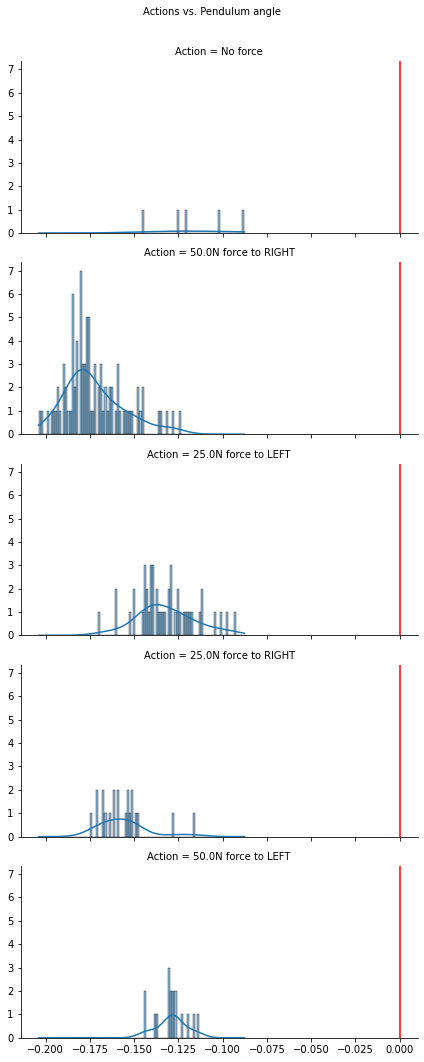


Policy Iteration: 2 - Length of the evaluation episode: 178.0 (init. state: [0, 0, -0.09, 0])


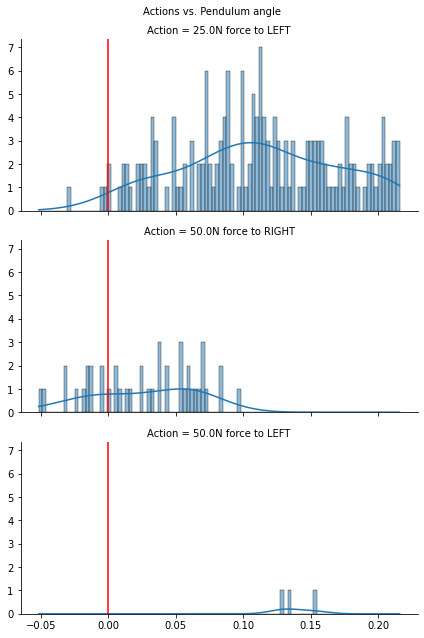


Policy Iteration: 3 - Length of the evaluation episode: 218.0 (init. state: [0, 0, 0.09, 0])


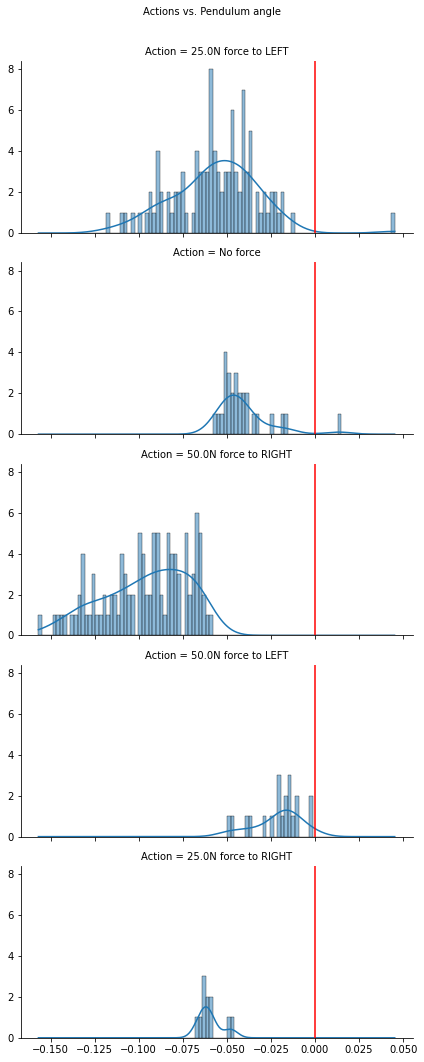


Policy Iteration: 4 - Length of the evaluation episode: 268.0 (init. state: [0, 0, 0.05, 0])


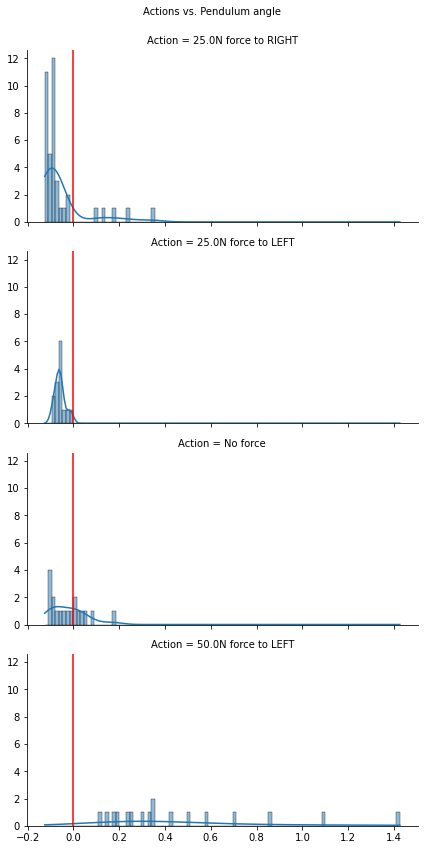


Policy Iteration: 5 - Length of the evaluation episode: 89.0 (init. state: [0, 0, -0.09, 0])


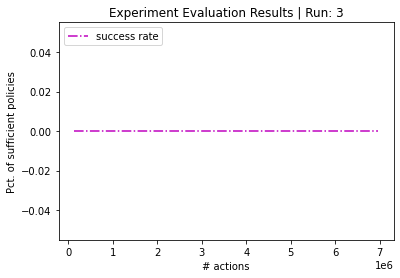


Runs:  60%|██████    | 3/5 [1:52:35<1:14:05, 2222.81s/it]

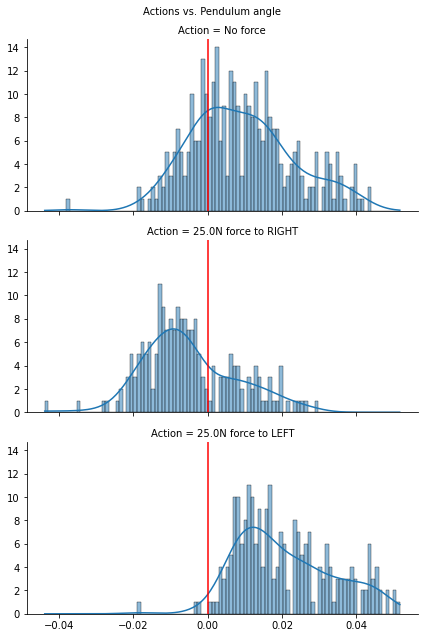


Policy Iteration: 1 - Length of the evaluation episode: 767.0 (init. state: [0, 0, -0.04, 0])


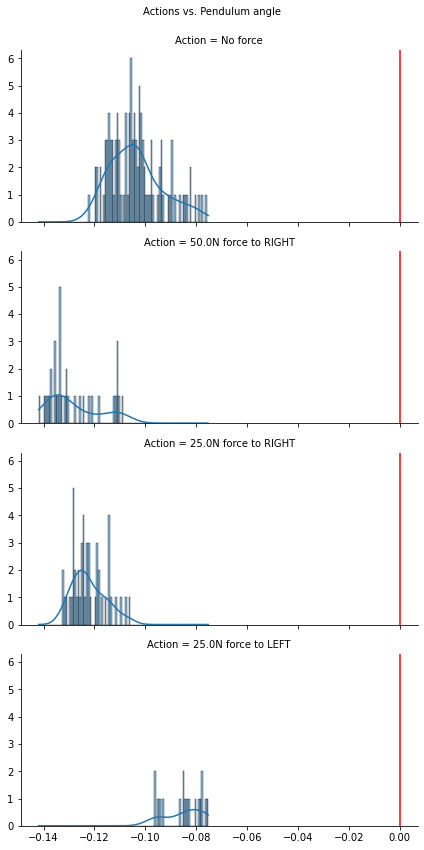


Policy Iteration: 2 - Length of the evaluation episode: 210.0 (init. state: [0, 0, -0.09, 0])
Policy performance decreased! Run-4 terminated!


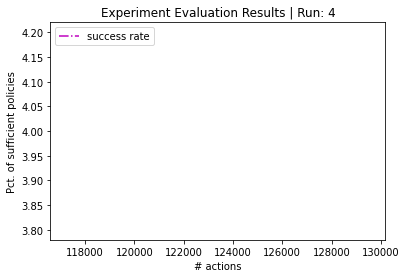


Runs:  80%|████████  | 4/5 [2:16:40<33:09, 1989.21s/it]  

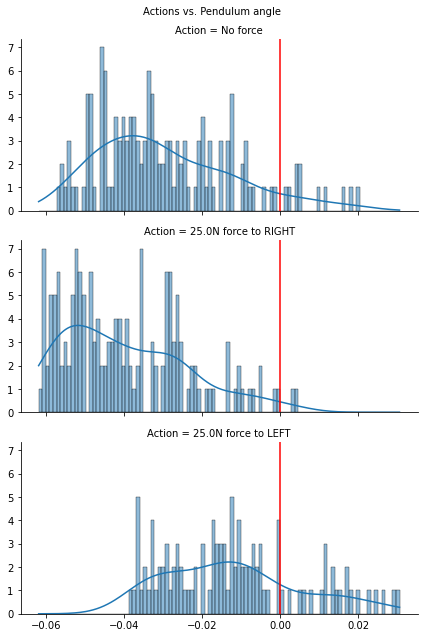


Policy Iteration: 1 - Length of the evaluation episode: 411.0 (init. state: [0, 0, -0.04, 0])


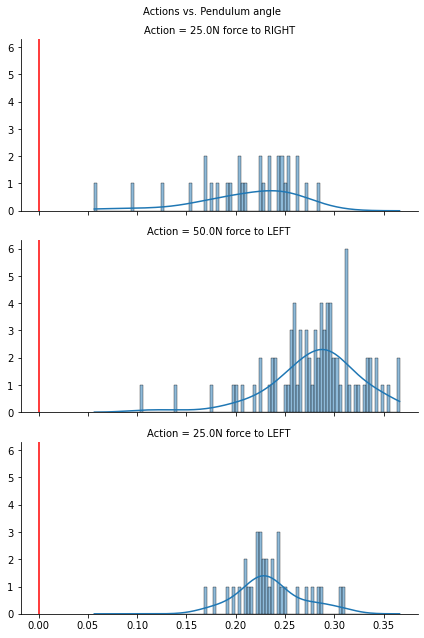


Policy Iteration: 2 - Length of the evaluation episode: 142.0 (init. state: [0, 0, 0.06, 0])


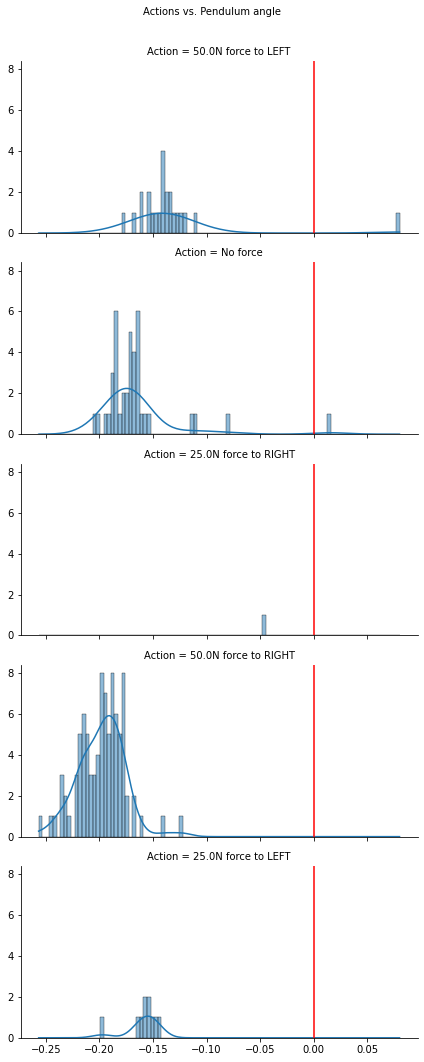


Policy Iteration: 3 - Length of the evaluation episode: 166.0 (init. state: [0, 0, 0.08, 0])


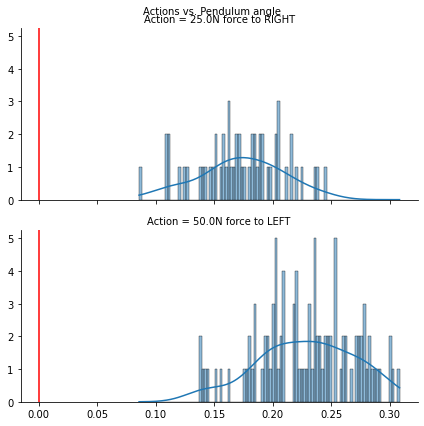


Policy Iteration: 4 - Length of the evaluation episode: 154.0 (init. state: [0, 0, 0.09, 0])


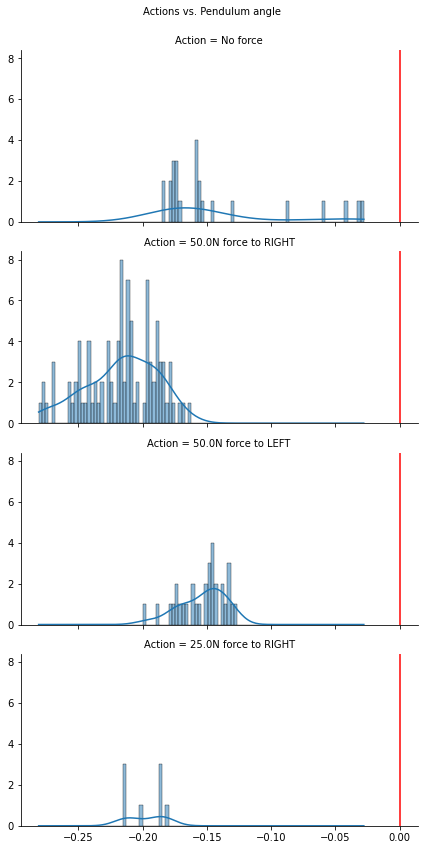


Policy Iteration: 5 - Length of the evaluation episode: 161.0 (init. state: [0, 0, -0.03, 0])


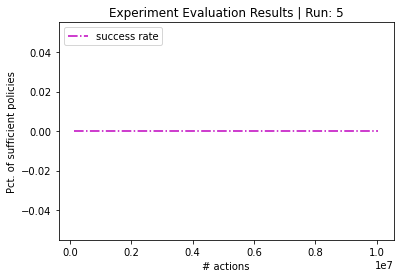


Evaluations: 100%|██████████| 1/1 [3:31:03<00:00, 12663.50s/it]


In [5]:
configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [5]
          , 'Roll-outs': [20]
          , 'Significance' : [0.1]
          }


# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size          = sample_size
                                                #, init_state_path       = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions      = configs['Actions'][0]
                                                , max_n_rollouts = rollout_max
                                                , sig_lvl        = sig_lvl

                                                , max_policy_iter_per_run = 5 # Maximum number of policy iterations per experiment
                                                , runs_per_config         = 5 # Number of experiments per one parameter config

                                                , eval_runs_per_state     = 1 # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = False # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = True # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = True # Show SR vs. action no. plot of exp. run
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()

Runs:   0%|          | 0/5 [00:00<?, ?it/s]


Currently evaluated configs:
 Samples: 50 | Actions: 9 | Roll-outs: 20 | Significance: 0.1


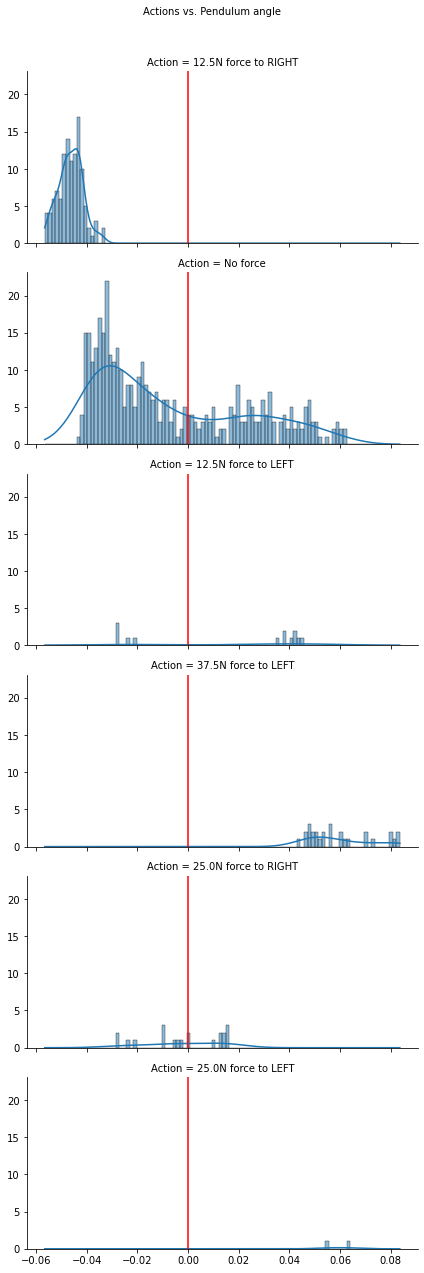


Policy Iteration: 1 - Length of the evaluation episode: 586.0 (init. state: [0, 0, -0.05, 0])


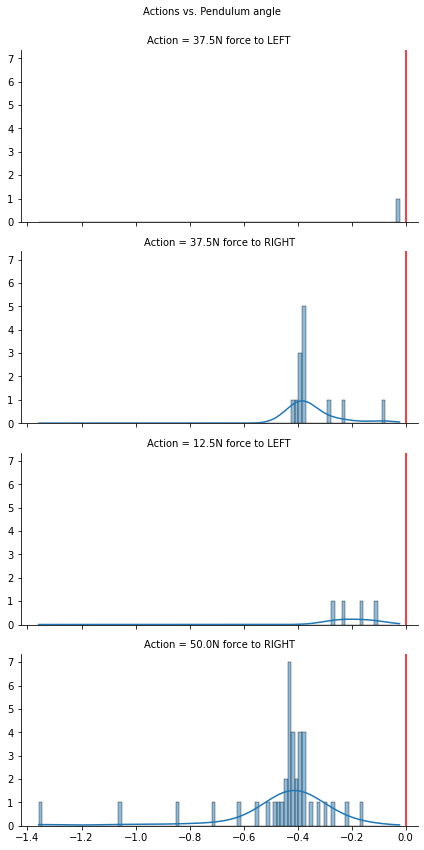


Policy Iteration: 2 - Length of the evaluation episode: 57.0 (init. state: [0, 0, -0.02, 0])
Policy performance decreased! Run-1 terminated!


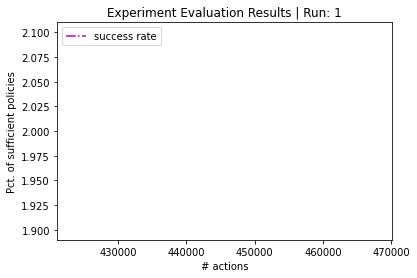


Runs:  20%|██        | 1/5 [3:37:57<14:31:51, 13077.92s/it]

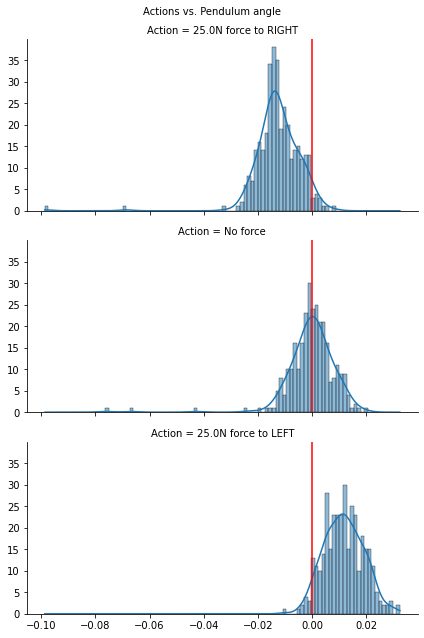


Policy Iteration: 1 - Length of the evaluation episode: 1001.0 (init. state: [0, 0, -0.1, 0])


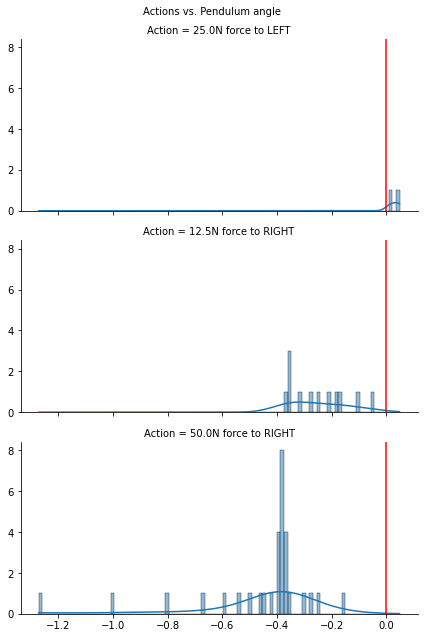


Policy Iteration: 2 - Length of the evaluation episode: 45.0 (init. state: [0, 0, 0.05, 0])
Policy performance decreased! Run-2 terminated!


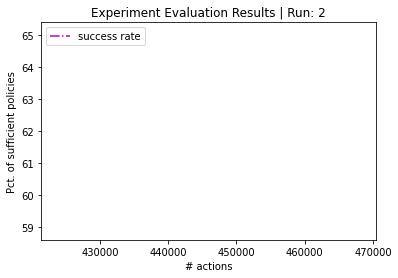


Runs:  40%|████      | 2/5 [4:14:15<8:10:23, 9807.89s/it]  

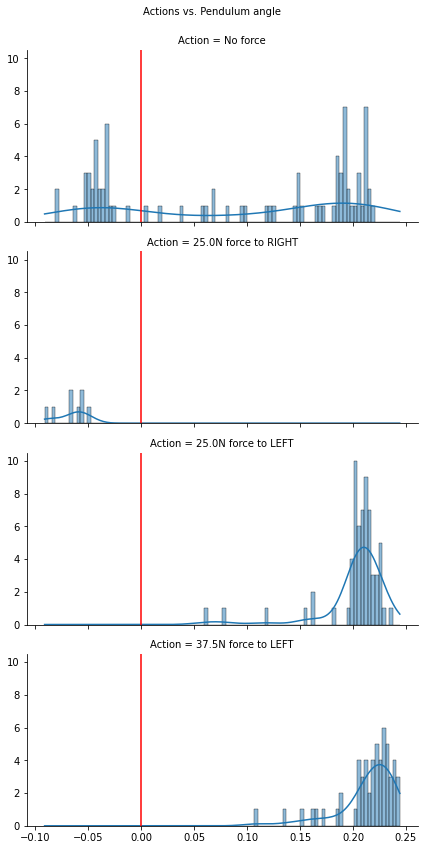


Policy Iteration: 1 - Length of the evaluation episode: 212.0 (init. state: [0, 0, -0.08, 0])


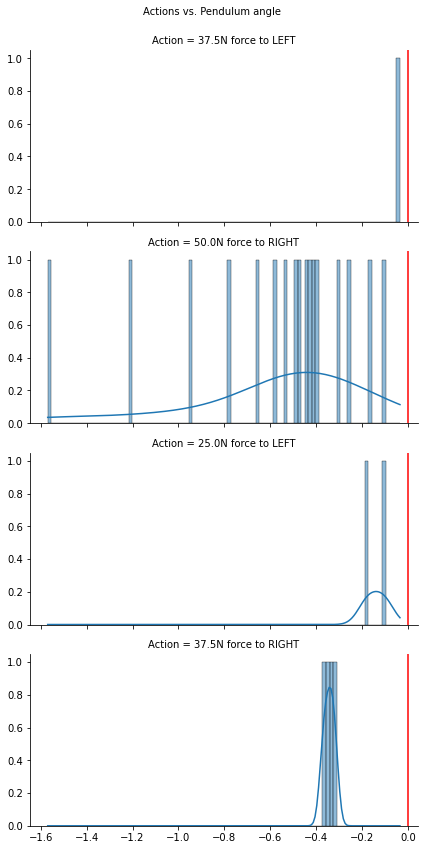


Policy Iteration: 2 - Length of the evaluation episode: 24.0 (init. state: [0, 0, -0.04, 0])


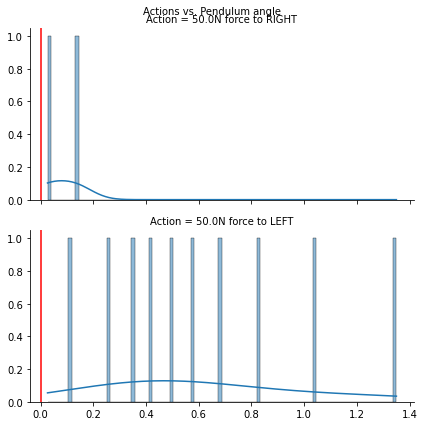


Policy Iteration: 3 - Length of the evaluation episode: 12.0 (init. state: [0, 0, 0.03, 0])


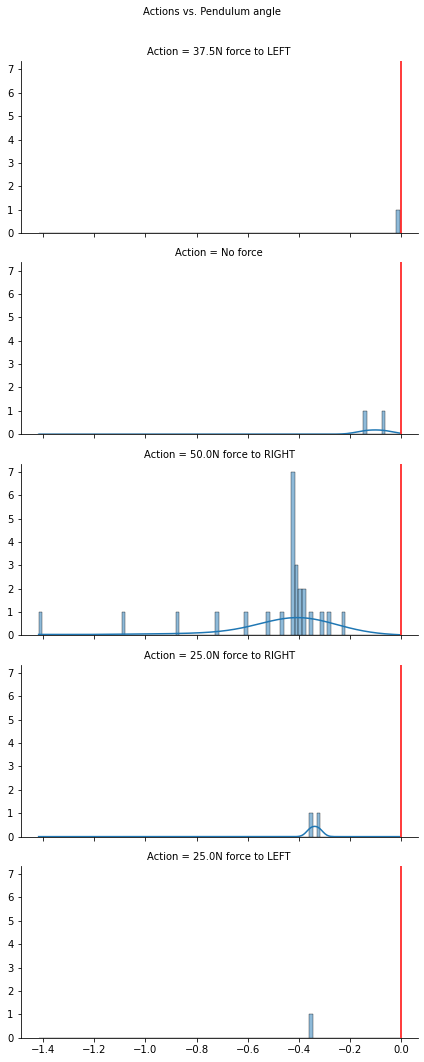


Policy Iteration: 4 - Length of the evaluation episode: 31.0 (init. state: [0, 0, -0.01, 0])


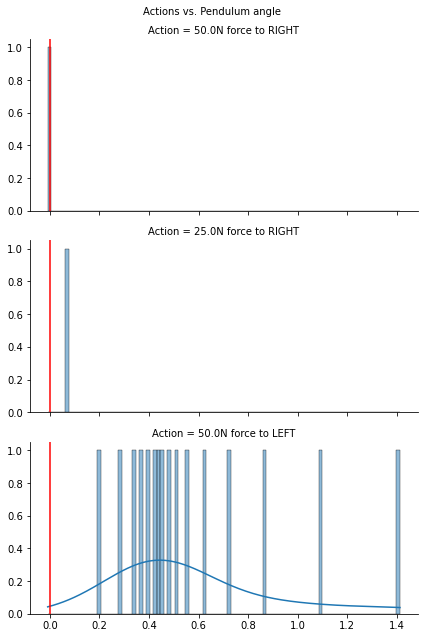


Policy Iteration: 5 - Length of the evaluation episode: 18.0 (init. state: [0, 0, -0.01, 0])


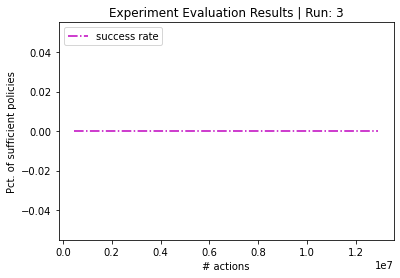


Runs:  60%|██████    | 3/5 [5:50:35<4:46:38, 8599.44s/it]

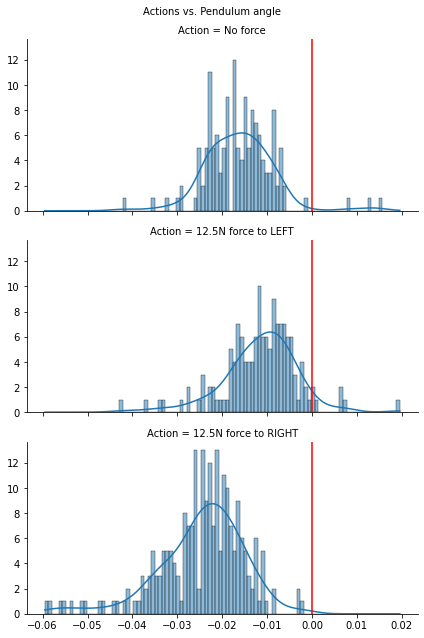


Policy Iteration: 1 - Length of the evaluation episode: 521.0 (init. state: [0, 0, 0.01, 0])


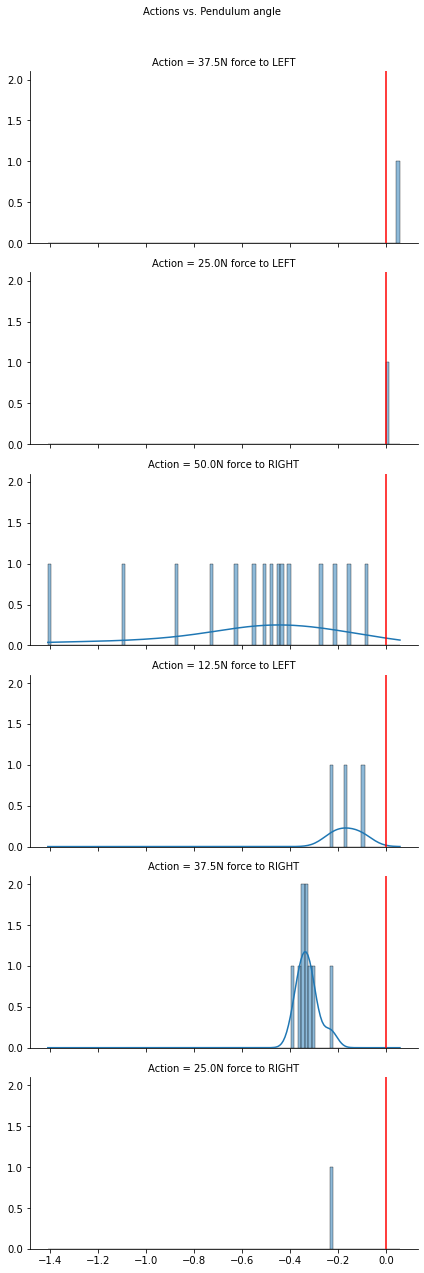


Policy Iteration: 2 - Length of the evaluation episode: 30.0 (init. state: [0, 0, 0.06, 0])


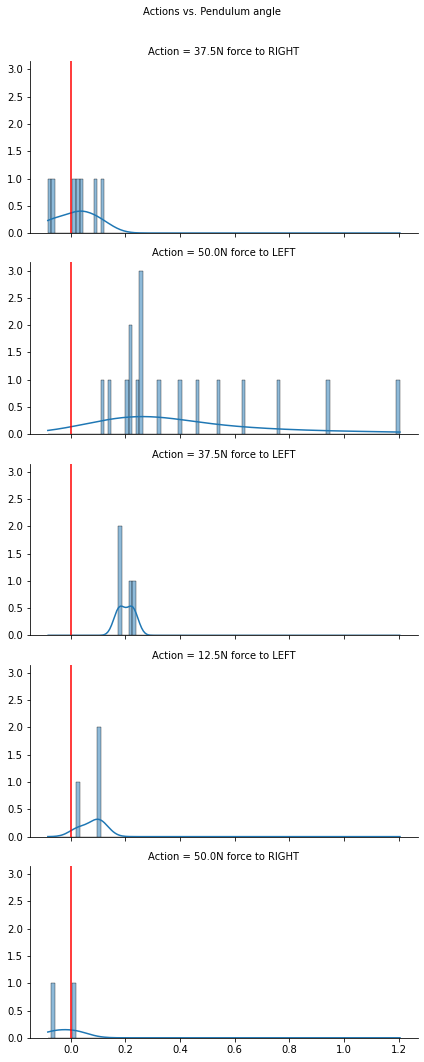


Policy Iteration: 3 - Length of the evaluation episode: 33.0 (init. state: [0, 0, 0.04, 0])


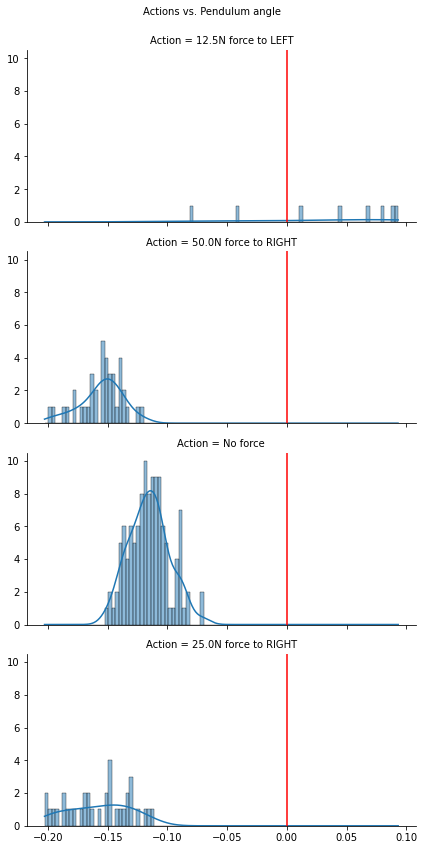


Policy Iteration: 4 - Length of the evaluation episode: 202.0 (init. state: [0, 0, 0.09, 0])


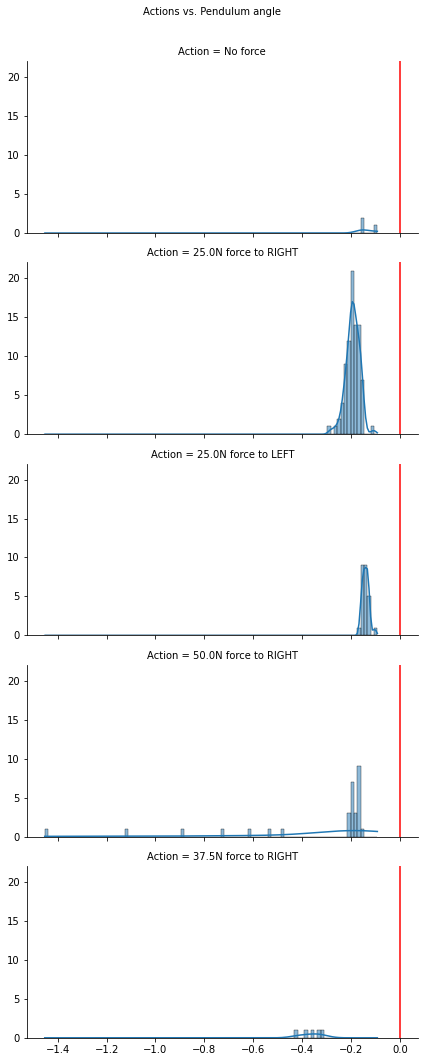


Policy Iteration: 5 - Length of the evaluation episode: 149.0 (init. state: [0, 0, -0.09, 0])


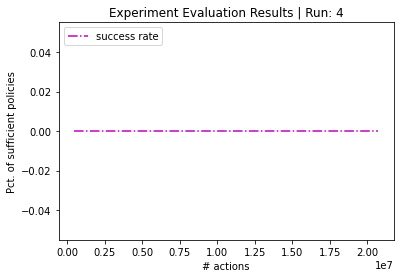


Runs:  80%|████████  | 4/5 [8:28:20<2:27:39, 8859.24s/it]

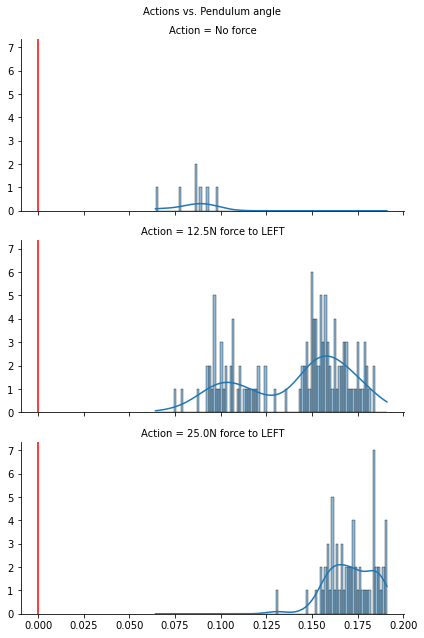


Policy Iteration: 1 - Length of the evaluation episode: 188.0 (init. state: [0, 0, 0.06, 0])


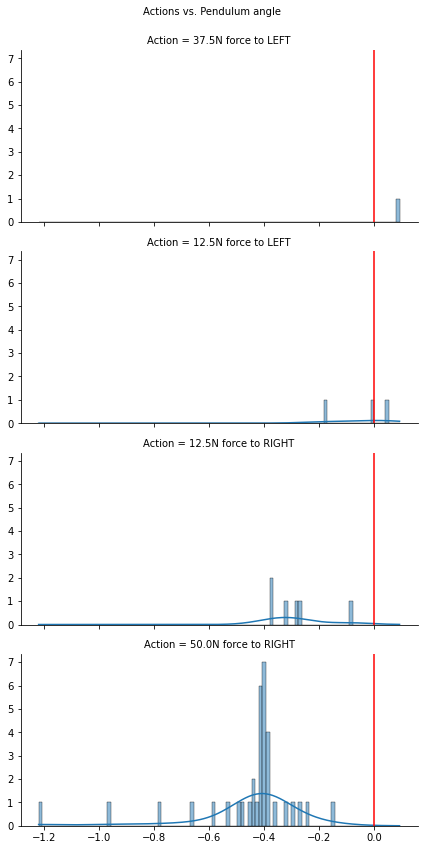


Policy Iteration: 2 - Length of the evaluation episode: 45.0 (init. state: [0, 0, 0.09, 0])


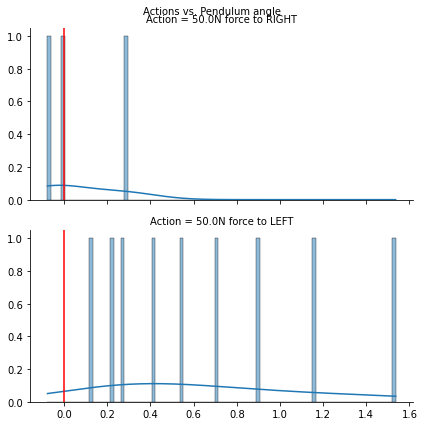


Policy Iteration: 3 - Length of the evaluation episode: 12.0 (init. state: [0, 0, -0.08, 0])


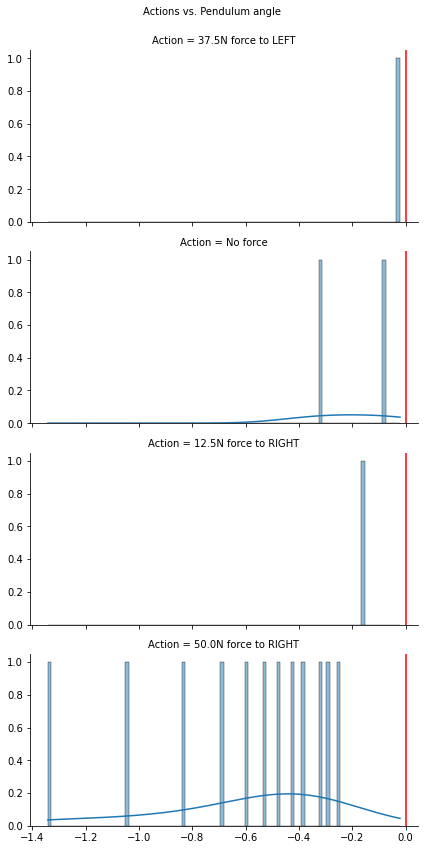


Policy Iteration: 4 - Length of the evaluation episode: 16.0 (init. state: [0, 0, -0.02, 0])


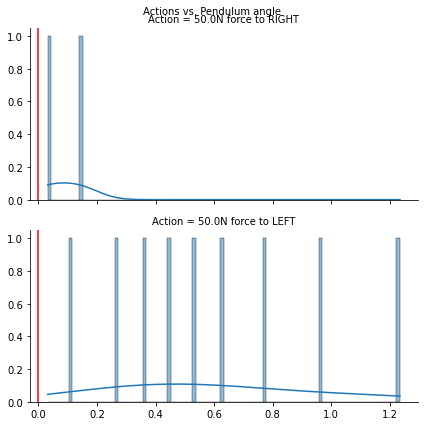


Policy Iteration: 5 - Length of the evaluation episode: 11.0 (init. state: [0, 0, 0.03, 0])


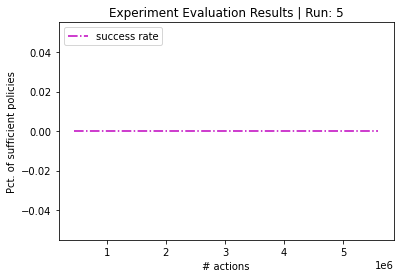


Evaluations: 100%|██████████| 1/1 [9:13:01<00:00, 33181.81s/it]


In [6]:
configs = { 'CONFIG_NO': 1
          , 'S': [N_STATES]
          , 'Actions' : [9]
          , 'Roll-outs': [20]
          , 'Significance' : [0.1]
          }


# Experiment execution
agg_results = []

eval_count = len(configs['S'])*len(configs['Actions'])*len(configs['Roll-outs'])*len(configs['Significance'])

pbar_evals = tqdm.tqdm(total=eval_count, desc="Evaluations")

for sample_size in configs['S']:
        
    for rollout_max in configs['Roll-outs']:

        for sig_lvl in configs['Significance']:

            run_results = evaluations_per_config(s_size          = sample_size
                                                #, init_state_path       = configs['init_state_path'] # Use a pre-designed init state configs   
                                                , n_actions      = configs['Actions'][0]
                                                , max_n_rollouts = rollout_max
                                                , sig_lvl        = sig_lvl

                                                , max_policy_iter_per_run = 5 # Maximum number of policy iterations per experiment
                                                , runs_per_config         = 5 # Number of experiments per one parameter config

                                                , eval_runs_per_state     = 1 # Episodes to generate from each init. state during evaluation phrase
                                                
                                                , off_policy_explr = EXPLORE_LOGIC # What algorithm to use

                                                , rollout_tracking          = False # Show rollout info.
                                                , dataset_tracking          = False # Show train dataset

                                                , train_plot_tracking       = False # Show model training plot
                                                , eval_summary_tracking     = False # Show a policy performance summary of evaluation runs
                                                , policy_behaviour_tracking = True # Show/store policy action selections vs. pendulum angle plot

                                                , show_experiment_run_eval_summary_plot = True # Show SR vs. action no. plot of exp. run
                                                )

            agg_results.append(run_results)

            pbar_evals.update(1)
                
pbar_evals.close()